# Importing libraries

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing data


In [132]:
athlete_data=pd.read_excel('/content/drive/MyDrive/Olymp_2021/Athletes.xlsx')
coach_data=pd.read_excel('/content/drive/MyDrive/Olymp_2021/Coaches.xlsx')
gender_data=pd.read_excel('/content/drive/MyDrive/Olymp_2021/EntriesGender.xlsx')
medal_data=pd.read_excel('/content/drive/MyDrive/Olymp_2021/Medals.xlsx')
team_data=pd.read_excel('/content/drive/MyDrive/Olymp_2021/Teams.xlsx')

# Data Showcase

In [133]:
athlete_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [134]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [135]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [136]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [137]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


# Descriptive Graphs

1.Discipline and Population

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


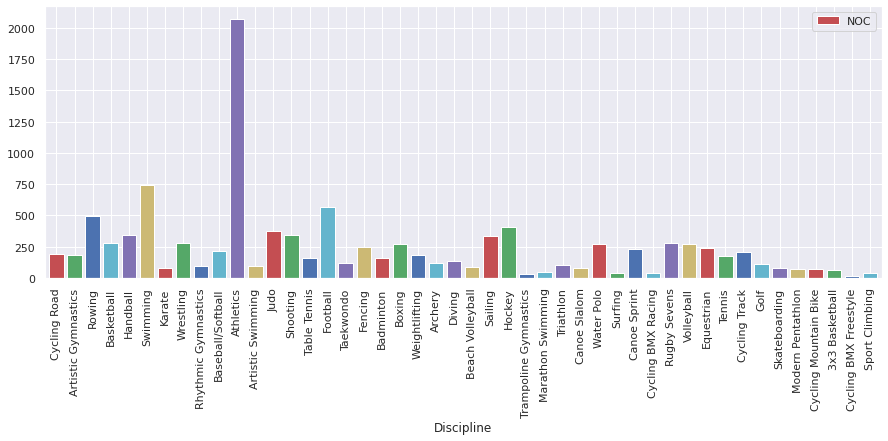

In [138]:
co_no=athlete_data.drop('Name',axis=1).groupby(['Discipline'],sort=False).count()
co_no.plot(kind='bar',figsize=(15,5),width=0.8,color='rgbcmy')

2.Coaches vs Discipline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


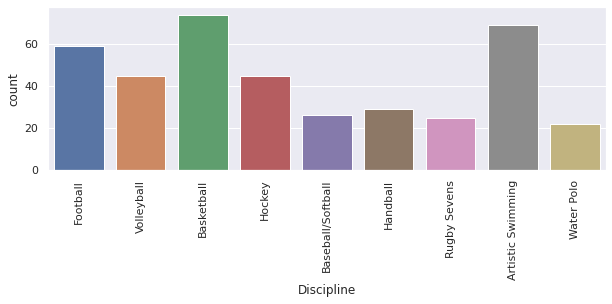

In [139]:
Coaches_dis = coach_data.loc[:,'Discipline']
sns.countplot(Coaches_dis)
plt.xticks(rotation='vertical')
plt.show()

3.Gender Ratio

In [140]:
gen=gender_data.drop('Total',axis=1)
gen=gen.drop('Discipline',axis=1)
gen.index=gender_data['Discipline']
gen.head(10)

,Female,Male
Discipline,,
3x3 Basketball,32,32
Archery,64,64
Artistic Gymnastics,98,98
Artistic Swimming,105,0
Athletics,969,1072
Badminton,86,87
Baseball/Softball,90,144
Basketball,144,144
Beach Volleyball,48,48


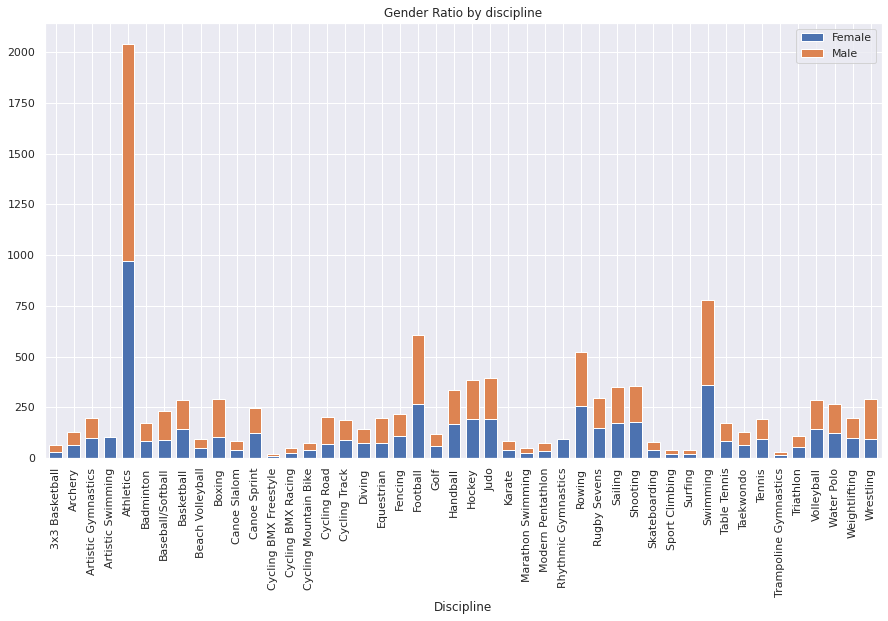

In [141]:
gen.plot(kind='bar', figsize=(15,8),width=0.7, stacked=True)

plt.xlabel('Discipline')
plt.ylabel('')
plt.title('Gender Ratio by discipline')

plt.show()

4.Teams vs Discipline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


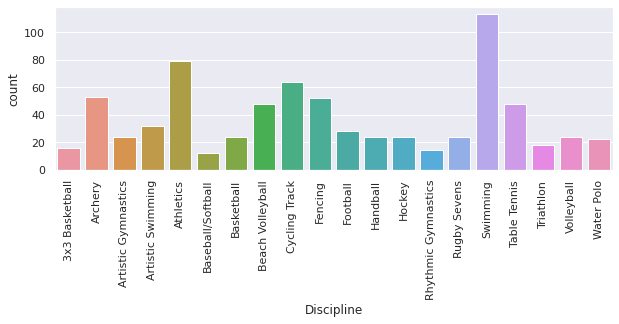

In [142]:
Discipline = team_data.loc[:,'Discipline']
sns.countplot(Discipline)
plt.xticks(rotation='vertical')
plt.show()

5.Medals Won by Country

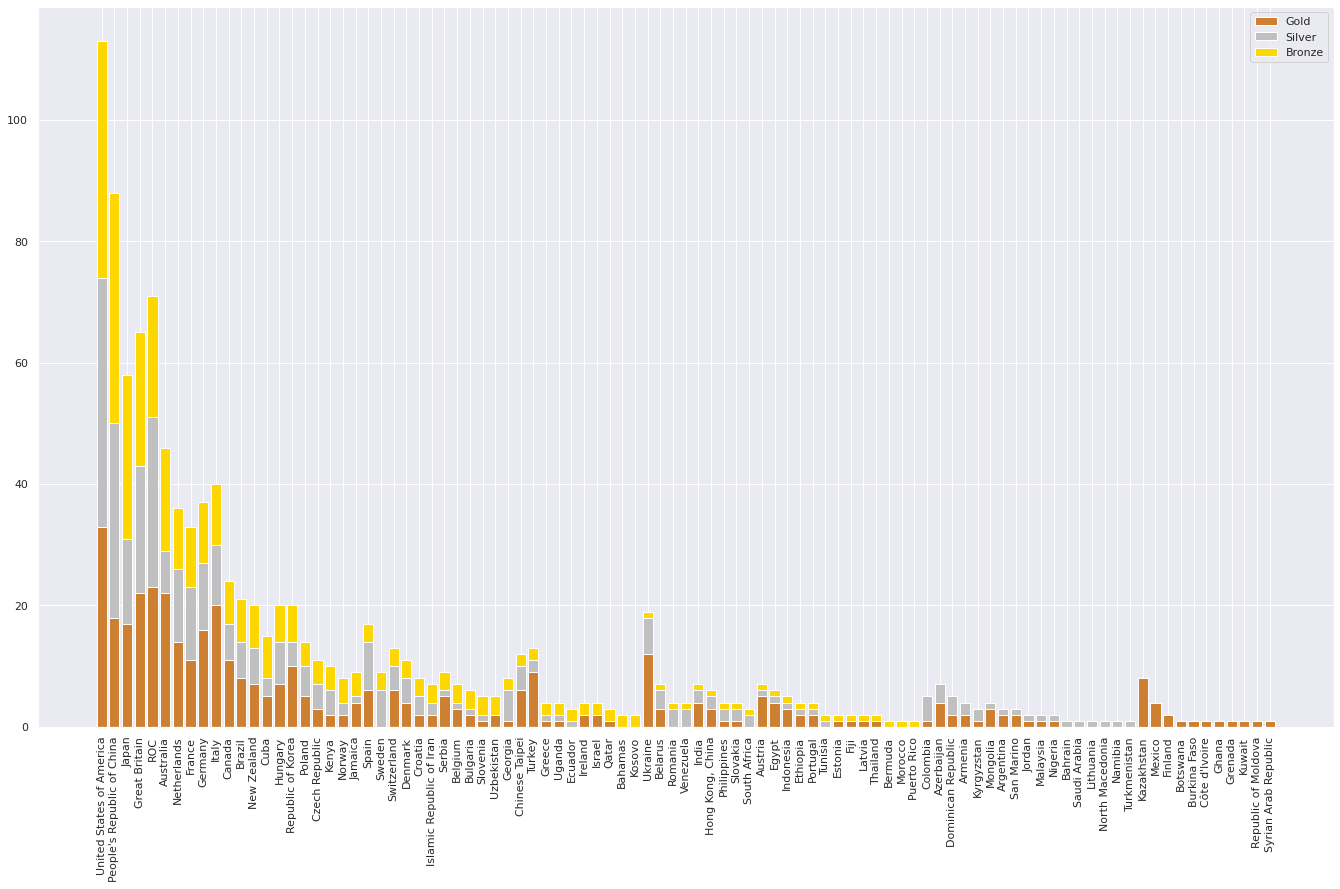

In [143]:
medals_country = medal_data.loc[:,'Team/NOC']
medals_Gold = medal_data.loc[:,'Gold']
medals_Silver = medal_data.loc[:,'Silver']
medals_Bronze = medal_data.loc[:,'Bronze']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
fig.set_size_inches(18, 10)
ax.bar(medals_country,medals_Bronze,color = '#CD7F32')
ax.bar(medals_country,medals_Silver,bottom=medals_Bronze,color = '#C0C0C0')
ax.bar(medals_country,medals_Gold,bottom=medals_Silver+medals_Bronze,color = '#FFD700')
plt.xticks(rotation='vertical')
plt.legend(['Gold','Silver','Bronze'])
plt.show()